(4630, 1)


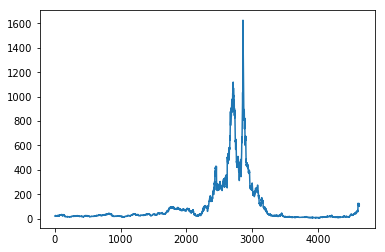

Actual, unscaled data
            Date    Open    High     Low   Close    WAP  No. of Shares  \
0     2017-11-16   21.10   21.90   20.50   21.90  21.24        30771.0   
1     2017-11-15   21.55   21.55   20.90   20.90  20.95        25670.0   
2     2017-11-14   22.05   22.40   21.60   22.00  21.98        36506.0   
3     2017-11-13   23.15   23.25   22.10   22.25  22.83        23476.0   
4     2017-11-10   24.10   24.10   22.90   23.25  23.31        12741.0   
5     2017-11-09   24.00   24.25   23.40   23.80  23.82        30568.0   
6     2017-11-08   23.40   23.80   23.40   23.70  23.66        40951.0   
7     2017-11-07   24.60   24.60   23.45   23.45  23.87        37346.0   
8     2017-11-06   25.15   25.40   24.35   24.65  24.72        17977.0   
9     2017-11-03   24.45   25.05   24.40   24.60  24.77        58025.0   
10    2017-11-02   24.65   25.00   23.40   24.35  24.67       265307.0   
11    2017-11-01   22.95   23.85   22.70   23.85  23.61        32072.0   
12    2017-10-31

In [181]:
import pandas
import matplotlib.pyplot as plt

DATA_FILE = 'BSE_BOM500013.csv'
# BSE_BOM539434.csv

dataset = pandas.read_csv(DATA_FILE, usecols=[1], engine='python')
print dataset.shape
plt.plot(dataset)
plt.show()
print "Actual, unscaled data"


In [118]:
# LSTM for international airline passengers problem with regression framing
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)
# fix random seed for reproducibility
numpy.random.seed(7)
# load the dataset
dataframe = read_csv(DATA_FILE, usecols=[1], engine='python')
dataset = dataframe.values

In [119]:
print 'dataset shape: ' + str(dataset.shape)
print dataframe[:10]

dataset shape: (4630, 1)
    Open
0  21.10
1  21.55
2  22.05
3  23.15
4  24.10
5  24.00
6  23.40
7  24.60
8  25.15
9  24.45


In [176]:
dataset = dataset.astype('float32')
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

print ('testX.shape= ', testX.shape)
print ('trainX.shape= ', trainX.shape)



('testX.shape= ', (1526, 1, 1))
('trainX.shape= ', (3100, 1, 1))


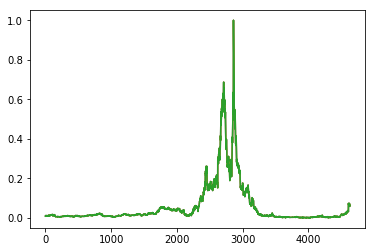

In [180]:
plt.plot(dataset)
plt.show()

Epoch 1/100
 - 13s - loss: 0.0068
Epoch 2/100
 - 12s - loss: 1.4137e-04
Epoch 3/100
 - 13s - loss: 1.4529e-04
Epoch 4/100
 - 11s - loss: 1.4782e-04
Epoch 5/100
 - 11s - loss: 1.4148e-04
Epoch 6/100
 - 12s - loss: 1.4662e-04
Epoch 7/100
 - 12s - loss: 1.4464e-04
Epoch 8/100
 - 12s - loss: 1.4494e-04
Epoch 9/100
 - 13s - loss: 1.4641e-04
Epoch 10/100
 - 11s - loss: 1.4214e-04
Epoch 11/100
 - 12s - loss: 1.4455e-04
Epoch 12/100
 - 12s - loss: 1.4349e-04
Epoch 13/100
 - 13s - loss: 1.4618e-04
Epoch 14/100
 - 13s - loss: 1.4500e-04
Epoch 15/100
 - 13s - loss: 1.4726e-04
Epoch 16/100
 - 12s - loss: 1.4494e-04
Epoch 17/100
 - 13s - loss: 1.4660e-04
Epoch 18/100
 - 13s - loss: 1.4488e-04
Epoch 19/100
 - 13s - loss: 1.4586e-04
Epoch 20/100
 - 12s - loss: 1.4281e-04
Epoch 21/100
 - 11s - loss: 1.4621e-04
Epoch 22/100
 - 11s - loss: 1.4609e-04
Epoch 23/100
 - 13s - loss: 1.4083e-04
Epoch 24/100
 - 12s - loss: 1.4493e-04
Epoch 25/100
 - 11s - loss: 1.4674e-04
Epoch 26/100
 - 12s - loss: 1.4946e-04

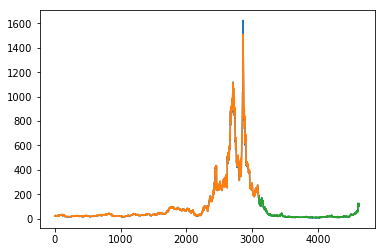

In [177]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

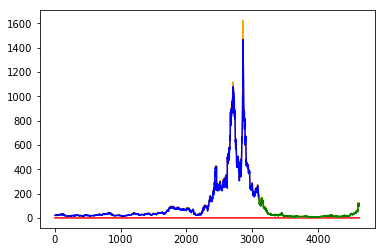

In [122]:
# plot baseline and predictions

plt.plot(dataset, 'red')  #has been scaled to MinMax(0,1)
plt.plot(scaler.inverse_transform(dataset), 'orange')
plt.plot(trainPredictPlot, 'blue')
plt.plot(testPredictPlot, 'green')
plt.show()


(1, 1526)
(1526, 1)
[[ 170.    150.    144.   ...,  112.5   101.25  100.  ]]
[[ 172.75083923]
 [ 168.61270142]
 [ 148.49359131]
 ..., 
 [ 108.61429596]
 [ 111.09184265]
 [  99.95931244]]


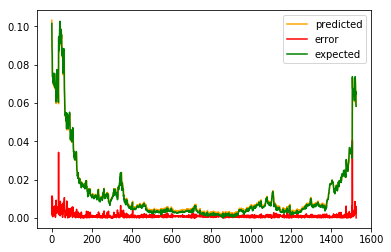

('accuracy=', 0.9796854521625163)


In [194]:

def get_accuracy(expected, actual, eps=0.0005):
    """
    returns number of values where expected-actual was within eps
    
    args:
        expected: eg: shape: (1, 1526)
                    values: [[ 170.00000302  149.99999774  143.99999736 ...,  112.50000141
                               101.24999769  100.00000264]]
        actual: eg: shape: (1526, 1)
                    values: [[ 167.29426575]
                             [ 163.26968384]
                             [ 143.70973206]
                             ..., 
                             [ 104.97814941]
                             [ 107.38265228]
                             [  96.58029938]]
                             
    returns accuracy (between 0 and 1)
    """
    print expected.shape
    print actual.shape
    print expected
    print actual
    
    testY_scaled = scaler.transform(testY)
    testPredict_scaled = scaler.transform(testPredict)
    expected = np.reshape(testY_scaled, (testY_scaled.shape[1], testY_scaled.shape[0]))
    error = abs(testPredict_scaled.flatten() - expected.flatten())
    
    correct = 0
    for e in error:
        if e <= eps:
            correct += 1
    accuracy = float(correct)/float(len(error))
    plt.plot(testPredict_scaled, 'orange', label='predicted')
    error_line =plt.plot(error, 'red', label='error')
    expected_line = plt.plot(expected, 'green', label='expected')
    plt.legend()
    plt.show()
    
    return accuracy

accuracy = get_accuracy(testY, testPredict)
print('accuracy=', accuracy)

